In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import re


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')





In [2]:
bestseller = pd.read_csv('bestsellers_with_categories.csv')
bestseller.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [3]:
bestseller = pd.read_csv('bestsellers_with_categories.csv')
bestseller.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
bestseller = pd.read_csv('bestsellers_with_categories.csv')
bestseller.tail()

,Name,Author,User Rating,Reviews,Price,Year,Genre
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction
549,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2019,Non Fiction


In [5]:
bestseller.shape

(550, 7)

In [6]:
bestseller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [7]:
bestseller.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [8]:
bestseller=bestseller.replace('', np.nan)

In [9]:
bestseller_1=bestseller.iloc[:100,:4]

In [10]:
subset_2=bestseller[['Name', 'Author', 'Price']]

In [11]:
subset_2.head()

,Name,Author,Price
0,10-Day Green Smoothie Cleanse,JJ Smith,8
1,11/22/63: A Novel,Stephen King,22
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,15
3,1984 (Signet Classics),George Orwell,6
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,12


In [12]:
bestseller.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [13]:
bestseller.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [14]:
bestseller[bestseller.duplicated(subset=['Name', 'Author'], keep=False)].sort_values('Name')

,Name,Author,User Rating,Reviews,Price,Year,Genre
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction
10,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2017,Fiction
20,All the Light We Cannot See,Anthony Doerr,4.6,36348,14,2014,Fiction
21,All the Light We Cannot See,Anthony Doerr,4.6,36348,14,2015,Fiction
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction
...,...,...,...,...,...,...,...
541,Wonder,R. J. Palacio,4.8,21625,9,2014,Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction


Text(0.5, 0, 'Year')

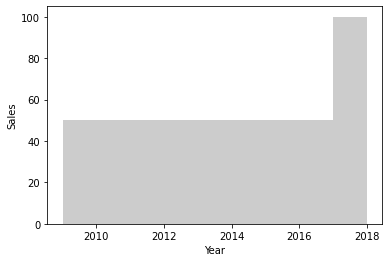

In [15]:
plt.hist(bestseller.Year, bins=np.arange(2009, 2019), color = '#cccccc')
plt.ylabel('Sales')
plt.xlabel('Year')

In [16]:
bestseller['Reviews'].max

<bound method Series.max of 0      17350
1       2052
2      18979
3      21424
4       7665
       ...  
545     9413
546    14331
547    14331
548    14331
549    14331
Name: Reviews, Length: 550, dtype: int64>

In [17]:
subset_4=bestseller[['Reviews', 'Price', 'User Rating']]

In [18]:
subset_4.head()

,Reviews,Price,User Rating
0,17350,8,4.7
1,2052,22,4.6
2,18979,15,4.7
3,21424,6,4.7
4,7665,12,4.8


In [19]:
bestseller_no_duplicates=bestseller.drop_duplicates()
bestseller_no_duplicates.shape

(550, 7)

In [20]:
bestseller['Genre'].value_counts()
bestseller['Genre'].value_counts(normalize=True)

Non Fiction    0.563636
Fiction        0.436364
Name: Genre, dtype: float64

In [21]:
bestseller['Genre'].value_counts()

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

In [22]:
#Top rated books - reviewed by at least 4000 people
bestseller_order = bestseller.groupby(['Name', 'Author', 'Genre'], as_index = False)[['User Rating', 'Reviews']].mean()
bestseller_order = bestseller_order[
    bestseller_order ['Reviews']> 4000]
bestseller_order = bestseller.sort_values('User Rating', ascending = False).head(20)
bestseller_order

,Name,Author,User Rating,Reviews,Price,Year,Genre
431,The Magnolia Story,Chip Gaines,4.9,7861,5,2016,Non Fiction
87,Dog Man: Lord of the Fleas: From the Creator o...,Dav Pilkey,4.9,5470,6,2018,Fiction
85,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,4.9,12619,8,2019,Fiction
84,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2019,Fiction
83,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2018,Fiction
82,Dog Man: A Tale of Two Kitties: From the Creat...,Dav Pilkey,4.9,4786,8,2017,Fiction
81,Dog Man and Cat Kid: From the Creator of Capta...,Dav Pilkey,4.9,5062,6,2018,Fiction
252,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2019,Fiction
476,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2013,Fiction
477,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2014,Fiction


In [23]:
bestseller.groupby(['Genre'], as_index = False)['Price'].mean()

,Genre,Price
0,Fiction,10.850000
1,Non Fiction,14.841935


In [24]:
bestseller.groupby(['Genre'])['Reviews'].mean()

Genre
Fiction        15683.791667
Non Fiction     9065.145161
Name: Reviews, dtype: float64

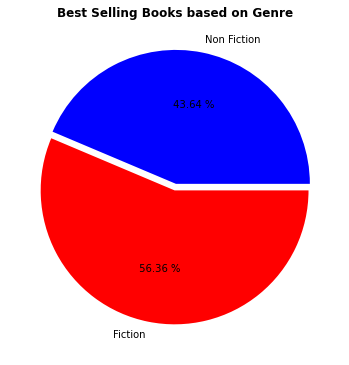

In [25]:
plt.figure(figsize =(10,5))
plt.pie (bestseller['Genre'].value_counts().sort_values(), labels = bestseller['Genre'].value_counts().index
        , explode =[0.05,0], autopct ='% 1.2f %%', colors = ['Blue', 'red'])

plt.subplots_adjust(bottom =0, top= 0.93, left = 0.5, right = 1)

plt.title("Best Selling Books based on Genre", fontweight = 'bold')

plt.show()

In [26]:
#Top 10 best selling authors 2009-2019
bestseller['Author'].value_counts().head(10).index

Index(['Jeff Kinney', 'Suzanne Collins', 'Gary Chapman', 'Rick Riordan',
       'American Psychological Association', 'Dr. Seuss', 'Gallup',
       'Rob Elliott', 'Bill O'Reilly', 'Eric Carle'],
      dtype='object')

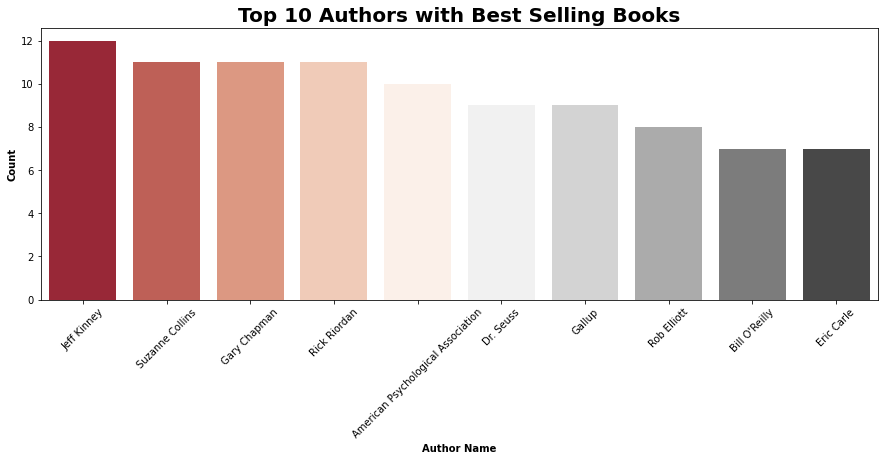

In [27]:
plt.figure(figsize = (15,5))
sns.barplot(x=bestseller['Author'].value_counts().head(10).index, y =bestseller['Author'].value_counts()
            .head(10).values, palette = "RdGy")
plt.xlabel('Author Name', fontweight = 'bold', fontsize = 10)
plt.ylabel('Count', fontweight = 'bold', fontsize = 10)
plt.title('Top 10 Authors with Best Selling Books', fontweight = 'bold', fontsize=20)
plt.xticks(rotation =45)
plt.show()

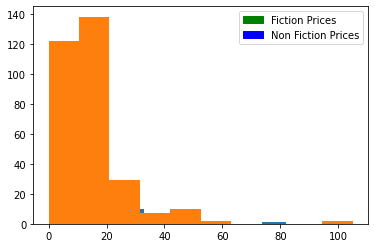

In [29]:
plt.hist(bestseller[bestseller['Genre']=='Fiction']['Price']);
plt.hist(bestseller[bestseller['Genre']=='Non Fiction'] ['Price']);

red_patch = mpatches.Patch(color ='green', label = 'Fiction Prices');

blue_patch = mpatches.Patch (color = 'blue', label = 'Non Fiction Prices');

plt.legend(handles = [red_patch, blue_patch])

plt.show()

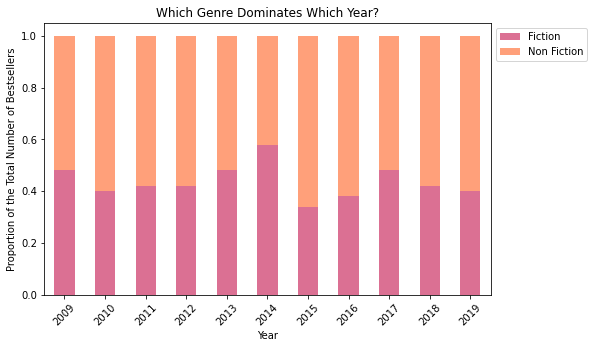

In [30]:
fiction = bestseller[bestseller['Genre'] == 'Fiction'].groupby(['Year']).count().Genre / 50
non_fiction = bestseller[bestseller['Genre'] == 'Non Fiction'].groupby(['Year']).count().Genre / 50

plt.figure(figsize=(8,5))
fiction.plot(kind='bar', color='palevioletred')
non_fiction.plot(kind='bar', bottom=fiction, color='lightsalmon')
plt.title('Which Genre Dominates Which Year?')
plt.xlabel('Year')
plt.ylabel('Proportion of the Total Number of Bestsellers')
plt.legend(('Fiction', 'Non Fiction'), loc='upper left', bbox_to_anchor=(1,1), ncol=1)
_ = plt.xticks(rotation=45)

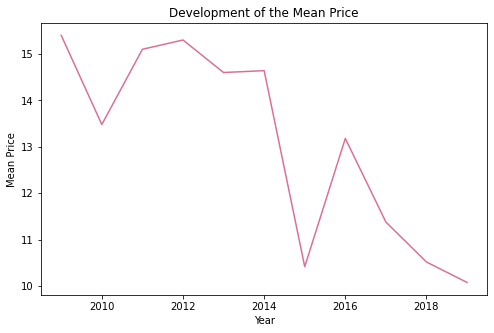

In [31]:
price_per_year = bestseller.groupby(['Year']).mean().Price

plt.figure(figsize=(8,5))
price_per_year.plot(kind='line', color='palevioletred')
plt.title('Development of the Mean Price')
plt.xlabel('Year')
_ = plt.ylabel('Mean Price')